### Quick introduction to AGHDrive
AGHDrive is a road scenario dataset focused on scenarios from Poland.
Currently all the data comes from one few hour long test drive around the city of Kraków.
We captured urban, highway and rular scenarios.

In this notebook a dataloader class provided alongside this dataset is introduced.
We decided on publishing this notebook alongside to better explain the basic usage of the dataloader.

Before you start this notebook you need to download dataset demo subset and annotations.

#### Imports
Now lets start with importing libraries needed in this demo.

In [1]:
import matplotlib.pyplot as plt
import json
import cv2
from pathlib import Path

from loader import AGHDriveLoader

#### Configuration for dataloader
AGHDriveLoader accepts one input for initialization - configuration. It can be provided as a path to .json file (both as str class or Path class from pathlib library) or as a dictionary. 

In the cell below an config variable is created (dictionary) and is saved to "config.json" file.
Then two variables are created containing path to this file, one is of class str and the other Path.

In [2]:
config = {
        "read_camera": True,  # if we need camera data
        "read_lidar": True,  # if we need lidar data
        "read_gps": True,  # if we need gps data
        
        "data_root_path": "../aghdrive/",  # root path to the dataset - other paths are relative to it
        "camera_path": "data/images",  # path to directory containing camera images relative to data_root_path
        "lidar_path": "data/lidar_pkl",  # path to directory containing lidar data relative to data_root_path
        "gps_path": "data/gps_pkl",  # path to directory containing gps data relative to data_root_path
        "annotations_path": "annotations.json"  # path to annotations.json file relative to data_root_path
    }

with open("config.json", "w") as f:
    json.dump(config, f)
    
config_path_str = "config.json"
config_path_path = Path("config.json")

#### Initialization
As mentioned the AGHDataLoader can be initialized with config provided in one of three ways.
Here we use initialization with a variable and two other possibilities are provided in comments.

In case you use demo dataset you will see warning informing that there is no data for some entries in annotation.json file - this is normal behaviour in case of missing data files.

In [3]:
loader = AGHDriveLoader(config)
# loader = AGHDriveLoader(config_path_str)
# loader = AGHDriveLoader(config_path_path)

	Removing those labels from set and continuing.


#### Config checking
We can check the config inside of the loader using it's filed "config". As you can see the data_root_path had been prepended to other paths.

In [4]:
loader.config

{'read_camera': True,
 'read_lidar': True,
 'read_gps': True,
 'data_root_path': PosixPath('/home/gjz0zd/Projects/AGHdrive/aghdrive'),
 'camera_path': PosixPath('/home/gjz0zd/Projects/AGHdrive/aghdrive/data/images'),
 'lidar_path': PosixPath('/home/gjz0zd/Projects/AGHdrive/aghdrive/data/lidar_pkl'),
 'gps_path': PosixPath('/home/gjz0zd/Projects/AGHdrive/aghdrive/data/gps_pkl'),
 'annotations_path': PosixPath('/home/gjz0zd/Projects/AGHdrive/aghdrive/annotations.json')}

#### Using the data
Now having loader initialized we can use it to obtain data generator using it's "generator" method. It returns two values: a generator and a number of samples available.

In [5]:
data_generator, number_of_samples = loader.generator()
print(f"There are {number_of_samples} samples available in your dataset")

There are 50 samples available in your dataset


Below we take a sample from the generator and see what exactly is available in the dataset.

In [6]:
sample = next(data_generator)
vars(sample)  # show fields available in the object

{'sample_id': 'WBA7F21070B235942_20230406_110938_0556_52549',
 'labels': <loader.Labels at 0x7f6b5567cca0>,
 'camera': <loader.Camera at 0x7f6b5567cd60>,
 'lidar': <loader.Lidar at 0x7f6b5567cc70>,
 'gps': <loader.GPS at 0x7f6b5567cfd0>}

Field "sample_id" contains the str value identifying the sample.

In [7]:
sample.sample_id

'WBA7F21070B235942_20230406_110938_0556_52549'

Field "lables" contain information both about classification of the frame ('SPecial situation') and about labeled objects - their class, coordinates and additional information

In [8]:
sample.labels.classes

{'Special situation': [0.0, 'Normal road']}

In [9]:
vars(sample.labels.bboxs[0])

{'coords': [418.3350462487153,
  217.1052631578947,
  726.1664953751283,
  690.7894736842105],
 'x': 418.3350462487153,
 'y': 217.1052631578947,
 'w': 726.1664953751283,
 'h': 690.7894736842105,
 'class_name': 'Car',
 'class_id': 2,
 'additional_data': {'id': 'MgTrfyLiMQ', 'Car': 0.0}}

Field camera contain the rgb image from windshield of the test vehicle in field data

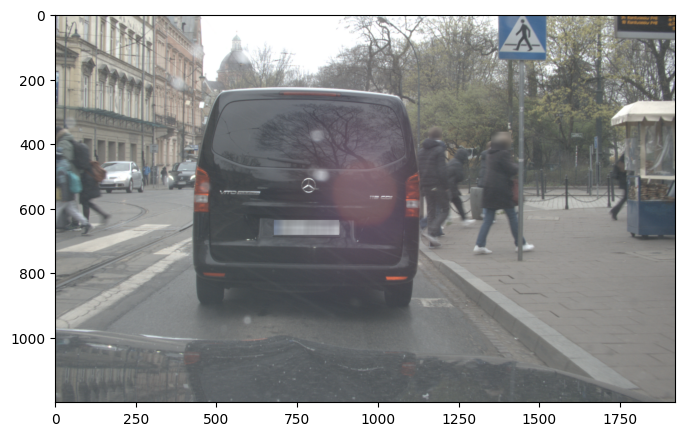

In [10]:
image = sample.camera.data
plt.figure(figsize=(8,6))
plt.imshow(image)
plt.show()

Lidar field contains two subfields: frame - containing lidar poitcloud and metadata - containing additional information.

In [11]:
sample.lidar.metadata

{'time': 1680777751.991475, 'frame': 48}

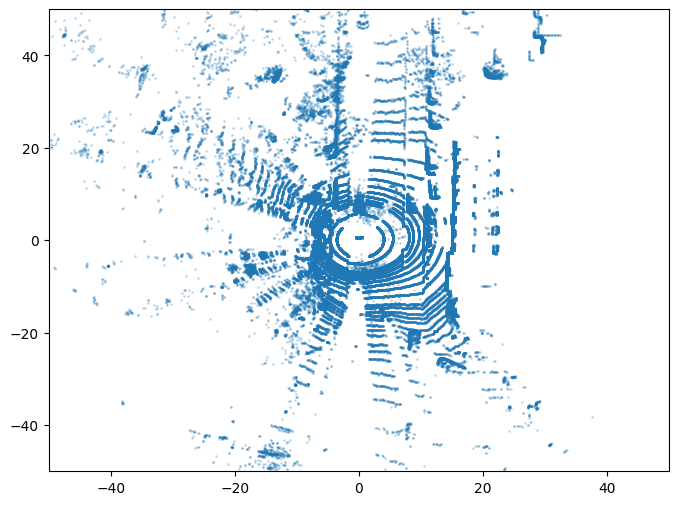

In [12]:
pointcloud = sample.lidar.frame
plt.figure(figsize=(8,6))
plt.scatter(pointcloud['x'], pointcloud['y'], s=1, alpha=0.2)
plt.xlim([-50, 50])
plt.ylim([-50, 50])
plt.show()

And lastly field gps contains data from our gps sensor

In [13]:
sample.gps.data

{'timestamp': 1680777751982511872,
 'inspvas': {'gnss_week': 2256,
  'seconds': 384599.39,
  'latitude': 50.05987117866139,
  'longitude': 19.942438444829186,
  'height': 246.33516350761056,
  'north_velocity': -1.0786137548369856,
  'east_velocity': -0.952374328054399,
  'up_velocity': -0.0008740847530180895,
  'roll': 1.2751585819477256,
  'pitch': 0.16632076606454194,
  'azimuth': 221.99909884108843,
  'status': 3},
 'corrimus': [1680777751.97271,
  {'imu_data_count': 1,
   'pitch_rate': -6.56568076973441e-05,
   'roll_rate': 0.0001293773816900228,
   'yaw_rate': 1.787274797459427e-05,
   'lateral_acc': 0.00041828445544926803,
   'longitudinal_acc': 0.002612737745360557,
   'vertical_acc': 0.0001744014683537846,
   'reserved1': 12.492000579833984,
   'reserved2': 0}],
 'insstdevs': [1680777751.595285,
  {'latitude_stdev': 3.15083384513855,
   'longitude_stdev': 3.084975242614746,
   'height_stdev': 6.6693572998046875,
   'north_velocity_stdev': 0.022596724331378937,
   'east_velocit

#### Example of visualization
We will start with simple label visualization

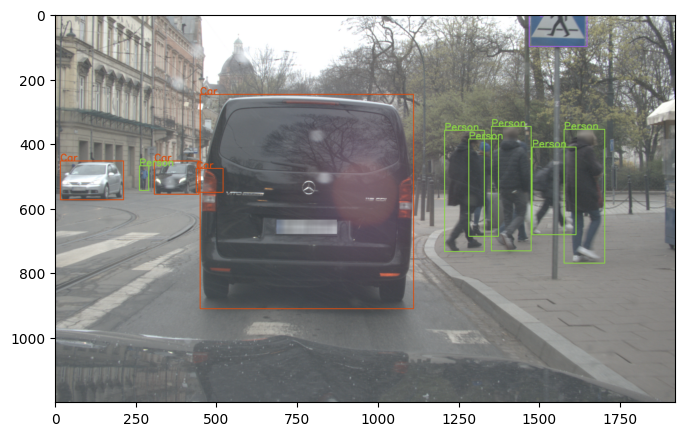

In [14]:
# support variable to set different colors for each class
class_to_color = {
             'Persons': (139, 211, 70),
             'Motorcycle': (239, 223, 72),
             'Car': (214, 78, 18),
             'Truck': (249, 165, 44),
             'Bus': (96, 219, 232),
             'Special vehicles': (22, 164, 216),
             'Sign': (155, 95, 224),
         }
# support variable to change names of classes
class_name_to_name = {
             'Persons': 'Person',
             'Motorcycle': 'Motorcycle',
             'Car': 'Car',
             'Truck': 'Truck',
             'Bus': 'Bus',
             'Special vehicles': 'Special vehicle',
             'Sign': 'Sign',
         }

# function for ploting labels on image using opencv
def plot_labels(img, labels):
    _img = img.copy()
    for l in labels.bboxs:
        x1 = int(l.x)
        y1 = int(l.y)
        x2 = int(l.x + l.w)
        y2 = int(l.y + l.h)
        cv2.rectangle(_img, (x1, y1), (x2, y2), class_to_color[l.class_name], 2)
        
        # TEXT
        # if l.w * l.h > 2000:
        _img = cv2.putText(_img, class_name_to_name[l.class_name], (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, class_to_color[l.class_name], 2, cv2.LINE_AA, False)
    return _img

sample = next(data_generator)
img = sample.camera.data
labels = sample.labels

img_with_labels = plot_labels(img, labels)
plt.figure(figsize=(8,6))
plt.imshow(img_with_labels)
plt.show()

Below is example usage of the data to visualize few frames

In [15]:
# reinitialize the generator to start from first sample
data_generator, number_of_samples = loader.generator()

# define method for plotting data
def plot_image_and_lidar(ax1, ax2, image, pointcloud, labels):
    ax1.imshow(plot_labels(image, labels))
    ax2.scatter(pointcloud['x'], pointcloud['y'], s=1, alpha=0.2)
    ax2.set_xlim([-50, 50])
    ax2.set_ylim([-50, 50])

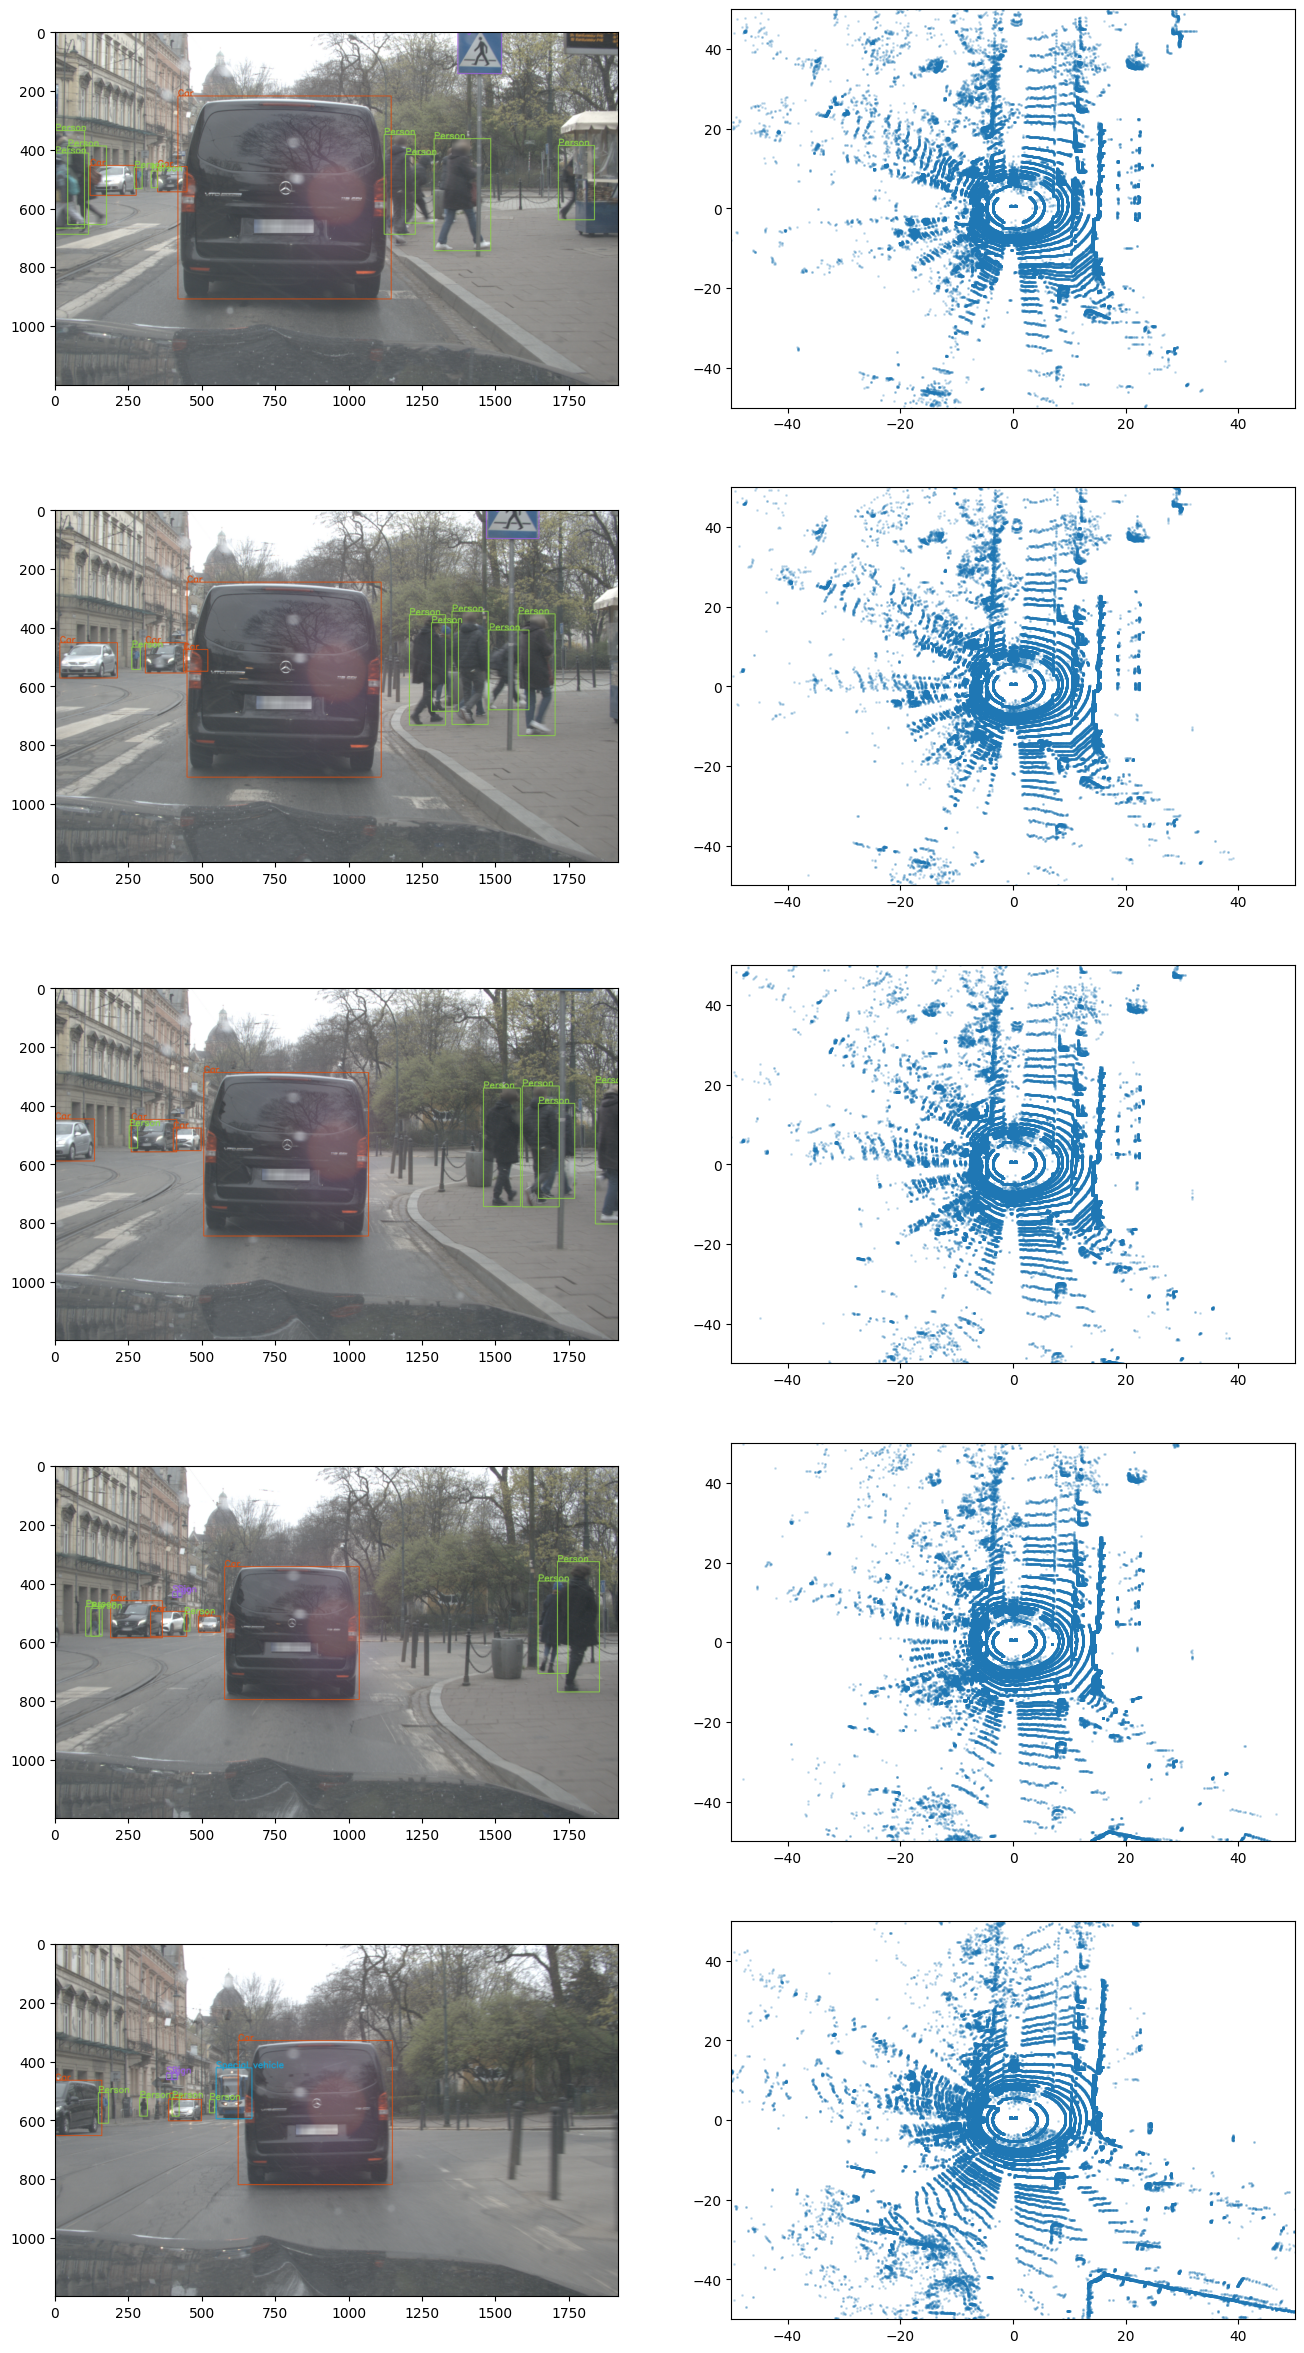

In [16]:
fig, axes = plt.subplots(5, 2, figsize=(16,30))
for i, sample in enumerate(data_generator):
    if i == 5:
        break
    plot_image_and_lidar(axes[i][0], axes[i][1], sample.camera.data, sample.lidar.frame, sample.labels)

### All-in-one example for video creation
Below example shows possible usage from start to an end of the data to create video containing labels from the AGHDrive dataset.

In [17]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

from loader import AGHDriveLoader

# Dataset configuration
config = {
        "read_camera": True,  # if we need camera data
        "read_lidar": False,  # if we need lidar data
        "read_gps": False,  # if we need gps data
        
        "data_root_path": "../aghdrive/",  # root path to the dataset - other paths are relative to it
        "camera_path": "data/images",  # path to directory containing camera images relative to data_root_path
        "lidar_path": "data/lidar_pkl",  # path to directory containing lidar data relative to data_root_path
        "gps_path": "data/gps_pkl",  # path to directory containing gps data relative to data_root_path
        "annotations_path": "annotations.json"  # path to annotations.json file relative to data_root_path
    }
# Variable for setting colors for classes
class_to_color = {
             'Persons': (139, 211, 70),
             'Motorcycle': (239, 223, 72),
             'Car': (214, 78, 18),
             'Truck': (249, 165, 44),
             'Bus': (96, 219, 232),
             'Special vehicles': (22, 164, 216),
             'Sign': (155, 95, 224),
         }
# Variable for changing names of classes
class_name_to_name = {
             'Persons': 'Person',
             'Motorcycle': 'Motorcycle',
             'Car': 'Car',
             'Truck': 'Truck',
             'Bus': 'Bus',
             'Special vehicles': 'Special vehicle',
             'Sign': 'Sign',
         }

# Function ploting labels on image
def plot_labels(img, labels):
    _img = img.copy()
    for l in labels.bboxs:
        x1 = int(l.x)
        y1 = int(l.y)
        x2 = int(l.x + l.w)
        y2 = int(l.y + l.h)
        cv2.rectangle(_img, (x1, y1), (x2, y2), class_to_color[l.class_name], 2)
        _img = cv2.putText(_img, class_name_to_name[l.class_name], (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, class_to_color[l.class_name], 2, cv2.LINE_AA, False)
    return _img

# Initialization of AGHDriveLoader
loader = AGHDriveLoader(config)
# Obtaining data generator
data_generator, number_of_samples = loader.generator()
# Creating video writer
out = cv2.VideoWriter('./example_video.avi', cv2.VideoWriter_fourcc(*'DIVX'), 10, (1920, 1200))

# Main loop for data obtaining and video writing
for sample in tqdm(data_generator, total=number_of_samples):
    img = plot_labels(sample.camera.data, sample.labels)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    out.write(img)
# Releasing the video writer
out.release()

	Removing those labels from set and continuing.


100%|███████████████████████████████████████████| 50/50 [00:03<00:00, 12.85it/s]
